# Load Images

In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm, metrics
from sklearn.utils import Bunch
from sklearn.model_selection import train_test_split
import skimage
from skimage.io import imread
from skimage.transform import resize
def load_image_files(container_path, dimension=(32, 32,3)):
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]
    images = []
    flat_data = []
    target = []
    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img = skimage.io.imread(file,as_gray=True)
            img_resized = resize(img, dimension, anti_aliasing=True, mode='reflect')
            flat_data.append(img_resized.flatten())
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)
    return Bunch(data=flat_data,
                  target=target,
        target_names=categories,
                  images=images)
image_dataset = load_image_files("C:/Users/HP 8470P/Desktop/LesChifres/Les chiffres")
X_train, X_test, y_train, y_test = train_test_split(
image_dataset.data, image_dataset.target, test_size=0.2,random_state=100)


# Accuracy & Raport de Calssification & Matrice de confusion pour differents méthodes de classification

# 1. SVM (LinearSVC)

In [16]:
svclassifier=LinearSVC(C = 0.01, random_state = 10)
svclassifier.fit(X_train,y_train)
y_pred=svclassifier.predict(X_test)

In [17]:
from sklearn.metrics import accuracy_score
print("Accuracy value(LinearSVC) is :",accuracy_score(y_test, y_pred))

Accuracy value(LinearSVC) is : 0.8109452736318408


In [7]:
from sklearn.metrics import classification_report
print("Classification raport(LinearSVC)")
print(classification_report(y_test, y_pred, target_names=image_dataset.target_names))

Classification raport(LinearSVC)
              precision    recall  f1-score   support

     class 0       0.93      1.00      0.96        39
     class 1       0.94      0.77      0.85        39
     class 2       0.70      0.79      0.74        38
     class 3       0.88      0.68      0.77        41
     class 4       0.69      0.80      0.74        30
     class 5       0.86      0.84      0.85        44
     class 6       0.84      0.94      0.89        33
     class 7       0.70      0.79      0.74        29
     class 8       0.71      0.59      0.65        34
     class 9       0.71      0.69      0.70        35
    classe10       0.93      1.00      0.96        40

   micro avg       0.81      0.81      0.81       402
   macro avg       0.81      0.81      0.80       402
weighted avg       0.82      0.81      0.81       402



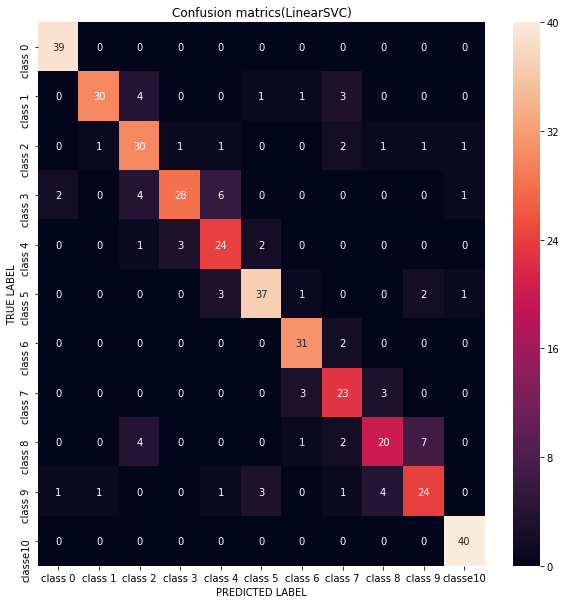

In [8]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
xticklabels=image_dataset.target_names, yticklabels=image_dataset.target_names)
plt.title("Confusion matrics(LinearSVC)")
plt.ylabel('TRUE LABEL')
plt.xlabel('PREDICTED LABEL')
plt.show()

# 2. SVM(noyau linéaire)

In [28]:
from sklearn.svm import SVC
svclassifier=SVC(kernel='linear',C=100, gamma='auto')
svclassifier.fit(X_train,y_train)
y_pred=svclassifier.predict(X_test)

In [29]:
from sklearn.metrics import accuracy_score
print("Accuracy value(kernel='linear',C=100, gamma='auto') is :",accuracy_score(y_test, y_pred))


Accuracy value(kernel='linear',C=100, gamma='auto') is : 0.9203980099502488


In [22]:
from sklearn.metrics import classification_report
print("Classification raport(kernel='linear')")
print(classification_report(y_test, y_pred, target_names=image_dataset.target_names))

Classification raport(kernel='linear')
              precision    recall  f1-score   support

     class 0       0.97      0.97      0.97        39
     class 1       0.90      0.92      0.91        39
     class 2       0.92      0.89      0.91        38
     class 3       0.88      0.90      0.89        41
     class 4       0.88      0.97      0.92        30
     class 5       0.97      0.89      0.93        44
     class 6       0.97      0.97      0.97        33
     class 7       0.90      0.93      0.92        29
     class 8       1.00      0.82      0.90        34
     class 9       0.77      0.86      0.81        35
    classe10       0.98      1.00      0.99        40

   micro avg       0.92      0.92      0.92       402
   macro avg       0.92      0.92      0.92       402
weighted avg       0.92      0.92      0.92       402



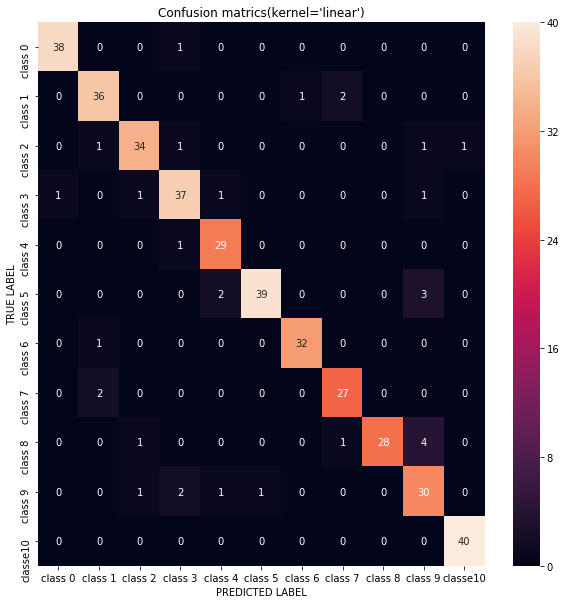

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
xticklabels=image_dataset.target_names, yticklabels=image_dataset.target_names)
plt.title("Confusion matrics(kernel='linear')")
plt.ylabel('TRUE LABEL')
plt.xlabel('PREDICTED LABEL')
plt.show()

# 3. SVM(noyau RBF gaussienne)

In [2]:
from sklearn.svm import SVC
svclassifier=SVC(kernel='rbf', random_state=0, gamma=.01, C=10)
svclassifier.fit(X_train,y_train)
y_pred=svclassifier.predict(X_test)


In [3]:
from sklearn.metrics import accuracy_score
print("Accuracy value(kernel='rbf',gamma=.01, C=10) is :",accuracy_score(y_test, y_pred))

Accuracy value(kernel='rbf',gamma=.01, C=10) is : 0.9303482587064676


In [4]:
from sklearn.metrics import classification_report
print("Classification raport(kernel='rbf',gamma=.01, C=10)")
print(classification_report(y_test, y_pred, target_names=image_dataset.target_names))

Classification raport(kernel='rbf',gamma=.01, C=10)
              precision    recall  f1-score   support

     class 0       0.97      0.97      0.97        39
     class 1       0.97      0.92      0.95        39
     class 2       0.90      0.92      0.91        38
     class 3       0.90      0.85      0.88        41
     class 4       0.85      0.93      0.89        30
     class 5       0.95      0.95      0.95        44
     class 6       1.00      1.00      1.00        33
     class 7       0.90      0.97      0.93        29
     class 8       1.00      0.79      0.89        34
     class 9       0.82      0.91      0.86        35
    classe10       0.98      1.00      0.99        40

   micro avg       0.93      0.93      0.93       402
   macro avg       0.93      0.93      0.93       402
weighted avg       0.93      0.93      0.93       402



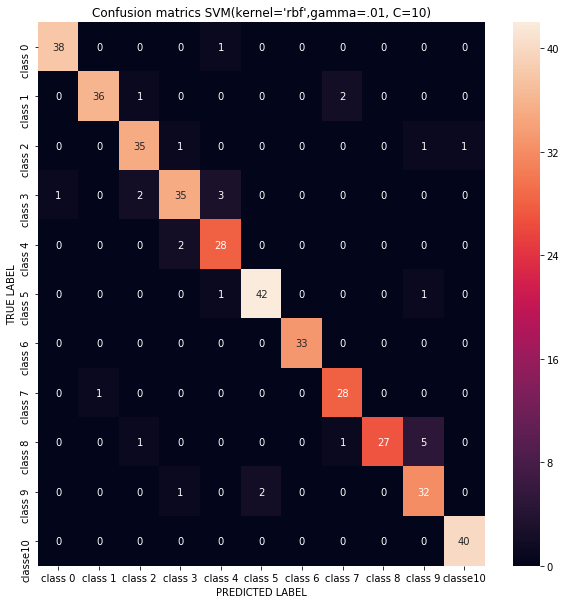

In [8]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
xticklabels=image_dataset.target_names, yticklabels=image_dataset.target_names)
plt.title("Confusion matrics SVM(kernel='rbf',gamma=.01, C=10)")
plt.ylabel('TRUE LABEL')
plt.xlabel('PREDICTED LABEL')
plt.show()

# 4. SVM(noyau polinomial)

In [56]:
from sklearn.svm import SVC
svclassifier=SVC(kernel="poly", degree=3, coef0=1, C=100)
svclassifier.fit(X_train,y_train)
y_pred=svclassifier.predict(X_test)


C:\Users\HP 8470P\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [57]:
from sklearn.metrics import accuracy_score
print("Accuracy value(kernel='poly') is :",accuracy_score(y_test, y_pred))

Accuracy value(kernel='poly') is : 0.9228855721393034


In [58]:
from sklearn.metrics import classification_report
print("Classification raport(kernel='poly')")
print(classification_report(y_test, y_pred, target_names=image_dataset.target_names))

Classification raport(kernel='poly')
              precision    recall  f1-score   support

     class 0       0.97      1.00      0.99        39
     class 1       0.93      0.97      0.95        39
     class 2       0.92      0.89      0.91        38
     class 3       0.86      0.88      0.87        41
     class 4       0.83      0.97      0.89        30
     class 5       0.97      0.89      0.93        44
     class 6       0.94      0.97      0.96        33
     class 7       0.97      0.97      0.97        29
     class 8       1.00      0.79      0.89        34
     class 9       0.81      0.83      0.82        35
    classe10       0.98      1.00      0.99        40

   micro avg       0.92      0.92      0.92       402
   macro avg       0.92      0.92      0.92       402
weighted avg       0.93      0.92      0.92       402



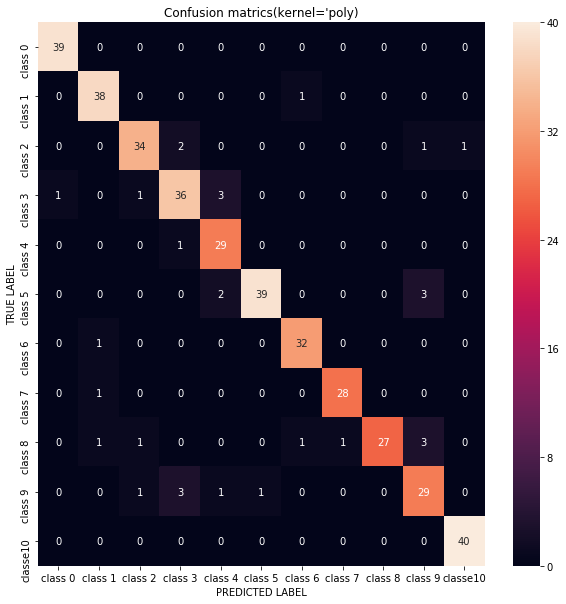

In [59]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
xticklabels=image_dataset.target_names, yticklabels=image_dataset.target_names)
plt.title("Confusion matrics(kernel='poly)")
plt.ylabel('TRUE LABEL')
plt.xlabel('PREDICTED LABEL')
plt.show()

# 5. KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier=KNeighborsClassifier(n_neighbors=1)
knnclassifier.fit(X_train,y_train)
y_pred=knnclassifier.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score
print("Accuracy value(KNN) is :",accuracy_score(y_test, y_pred))

Accuracy value(KNN) is : 0.835820895522388


In [52]:
from sklearn.metrics import classification_report
print("Classification raport(KNN)")
print(classification_report(y_test, y_pred, target_names=image_dataset.target_names))

Classification raport(KNN)
              precision    recall  f1-score   support

     class 0       1.00      0.92      0.96        39
     class 1       0.83      0.87      0.85        39
     class 2       0.79      0.79      0.79        38
     class 3       0.71      0.71      0.71        41
     class 4       0.61      0.77      0.68        30
     class 5       0.89      0.77      0.83        44
     class 6       0.97      1.00      0.99        33
     class 7       0.89      0.83      0.86        29
     class 8       0.96      0.76      0.85        34
     class 9       0.64      0.77      0.70        35
    classe10       1.00      1.00      1.00        40

   micro avg       0.84      0.84      0.84       402
   macro avg       0.84      0.84      0.84       402
weighted avg       0.85      0.84      0.84       402



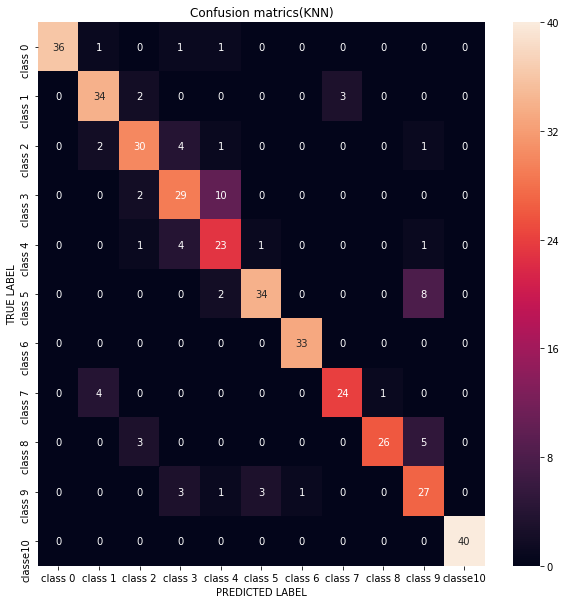

In [53]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
xticklabels=image_dataset.target_names, yticklabels=image_dataset.target_names)
plt.title("Confusion matrics(KNN)")
plt.ylabel('TRUE LABEL')
plt.xlabel('PREDICTED LABEL')
plt.show()

# Learning curve & Validation curve pour diffirents méthodes de classification 

# Fonction de visualisation pour learning curve

In [9]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training ")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# 1. KNN

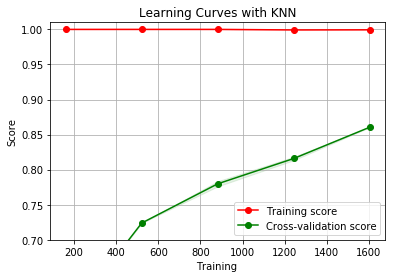

In [15]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

X, y = image_dataset.data, image_dataset.target




# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(4)
plot_learning_curve(svclassifier,"Learning Curves with KNN", X, y,ylim=(0.7, 1.01), cv=cv);

# 2.SVM(kernel linear)

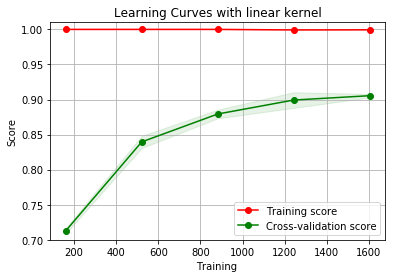

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

X, y = image_dataset.data, image_dataset.target




# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=2, test_size=0.2, random_state=0)
plot_learning_curve(svclassifier,"Learning Curves with linear kernel", X, y,ylim=(0.7, 1.01), cv=cv);

# 3.SVM(kernel rbf gaussien)

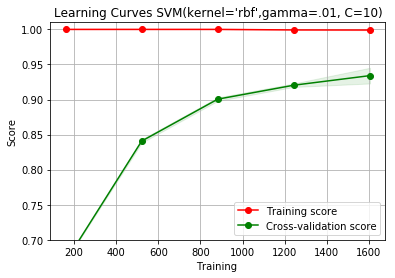

In [10]:
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

X, y = image_dataset.data, image_dataset.target




# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=2, test_size=0.2, random_state=0)
plot_learning_curve(svclassifier,"Learning Curves SVM(kernel='rbf',gamma=.01, C=10)", X, y,ylim=(0.7, 1.01), cv=cv);

# 4.SVM(kenel polinomial)

C:\Users\HP 8470P\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\HP 8470P\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\HP 8470P\Anaconda\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\HP 8470P\Anaconda\lib\site-packages\sklearn\svm\base.py:196: Fut

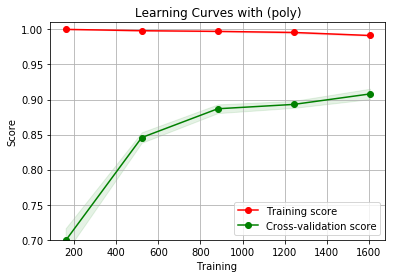

In [69]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

X, y = image_dataset.data, image_dataset.target




# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=2, test_size=0.2, random_state=0)
plot_learning_curve(svclassifier,"Learning Curves with (poly)", X, y,ylim=(0.7, 1.01), cv=cv);

# 5.SVM(linearSVC)

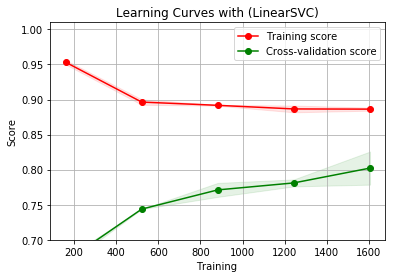

In [12]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

X, y = image_dataset.data, image_dataset.target




# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=2, test_size=0.2, random_state=0)
plot_learning_curve(svclassifier,"Learning Curves with (LinearSVC)", X, y,ylim=(0.7, 1.01), cv=cv);

# Validation curve

# KNN

In [54]:
from sklearn.model_selection import validation_curve
X, y = image_dataset.data,image_dataset.target
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(4)
param_range = np.arange(3, 20, 2)

train_scores, test_scores = validation_curve(knnclassifier,X,y, param_name="n_neighbors",
    param_range=param_range, cv=cv, scoring="f1_weighted", n_jobs=4,)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

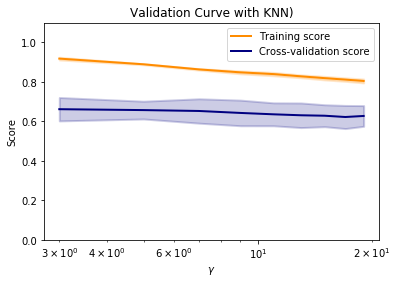

In [55]:
plt.title("Validation Curve with KNN)")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

# SVM

In [5]:
from sklearn.model_selection import validation_curve
X, y = image_dataset.data,image_dataset.target

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(svclassifier, X, y, param_name="gamma", param_range=param_range,cv=5, scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# 1.Visualisation de Validation curve pour SVM(noyau rbf gaussien)

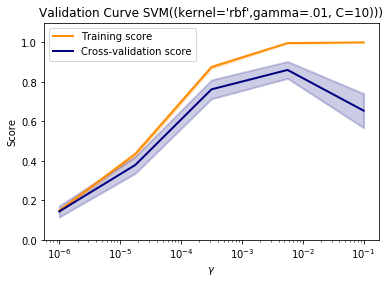

In [6]:
plt.title("Validation Curve SVM((kernel='rbf',gamma=.01, C=10)))")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

# 2.Visualisation de Validation curve pour SVM(noyau polinomial)

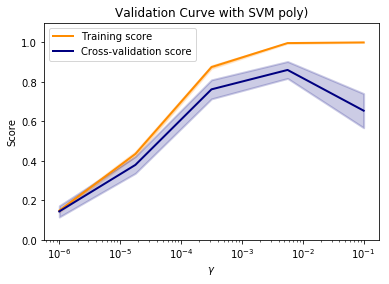

In [68]:
plt.title("Validation Curve with SVM poly)")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

# 3. Visualisation de Validation curve pour SVM(noyau linéaire)

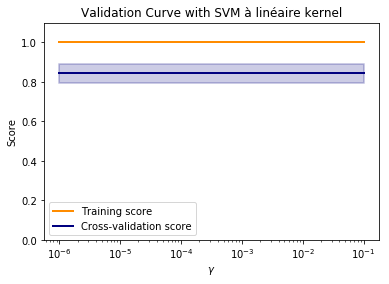

In [27]:
plt.title("Validation Curve with SVM à linéaire kernel")
plt.xlabel(r"$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()